# II. Programming and critical analysis

## Setup

In [17]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

## Load Dataset

In [19]:
heart_disease = pd.read_csv("Heart Disease Data.csv")

In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
y = heart_disease["target"]
X = heart_disease.drop("target", axis=1)

## Instance StratifiedKfolds

In [22]:
strat_kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

## Exercise 1

### a.

In [23]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
gnb_clf = GaussianNB()

In [24]:
knn_cv_scores = cross_val_score(knn_clf, X, y, cv=strat_kfolds, scoring="accuracy")
knn_cv_scores

array([0.62295082, 0.57377049, 0.67213115, 0.7       , 0.7       ])

In [25]:
gnb_cv_scores = cross_val_score(gnb_clf, X, y, cv=strat_kfolds, scoring="accuracy")
gnb_cv_scores

array([0.8852459 , 0.80327869, 0.80327869, 0.85      , 0.83333333])

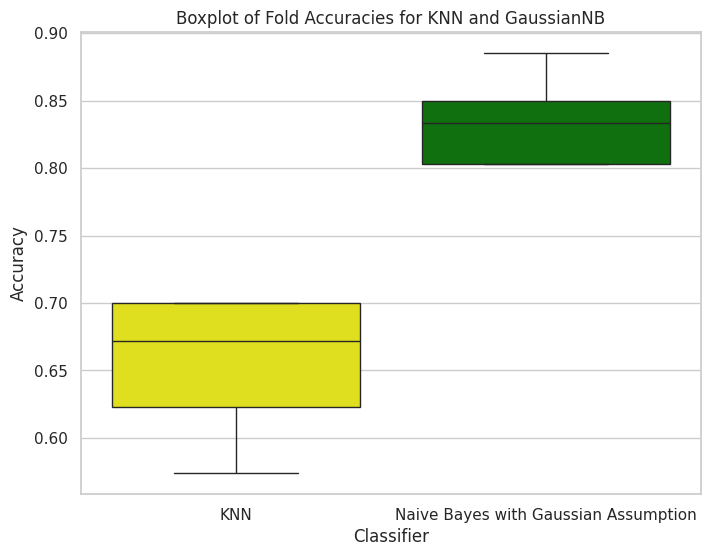

In [26]:
all_scores = list()
for score in knn_cv_scores:
    all_scores.append({
        "Classifier": "KNN",
        "Accuracy": score
    })

for score in gnb_cv_scores:
    all_scores.append({
        "Classifier": "Naive Bayes with Gaussian Assumption",
        "Accuracy": score
    })

scores_df = pd.DataFrame(all_scores)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x="Classifier", y="Accuracy", data=scores_df, hue="Classifier", palette=["yellow", "green"])
plt.title("Boxplot of Fold Accuracies for KNN and GaussianNB")
plt.ylabel("Accuracy")
plt.xlabel("Classifier")
plt.show()

The KNN had an overall lower accuracy and was less stable regarding the performance results compared to the Naive Bayes model. This is likely because the dataset was not scaled. Based on the fact that a knn makes prediction based on the "closest points" to an instance, if the features are on different scales, one feature with a large range will dominate the distance calculation, which can distort the actual "closeness" between points and therefore cause a unstability in the performance of the KNN.

##

### b. 

In [27]:
scaler = MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)

In [28]:
knn_cv_scaled_scores = cross_val_score(knn_clf, X_scaled, y, cv=strat_kfolds, scoring="accuracy")
knn_cv_scaled_scores

array([0.83606557, 0.80327869, 0.85245902, 0.83333333, 0.78333333])

In [29]:
gnb_cv_scaled_scores = cross_val_score(gnb_clf, X_scaled, y, cv=strat_kfolds, scoring="accuracy")
gnb_cv_scaled_scores

array([0.8852459 , 0.80327869, 0.80327869, 0.85      , 0.83333333])

In [30]:
print("Original KNN score:",round(np.mean(knn_cv_scores),2),"±",round(np.std(knn_cv_scores),2))
print("KNN score on scaled dataset:",round(np.mean(knn_cv_scaled_scores),2),"±",round(np.std(knn_cv_scaled_scores),2))

Original KNN score: 0.65 ± 0.05
KNN score on scaled dataset: 0.82 ± 0.02


In [31]:
print("Original Naive Bayes score:",round(np.mean(gnb_cv_scores),2),"±",round(np.std(gnb_cv_scores),2))
print("Naive Bayes score on scaled dataset:",round(np.mean(gnb_cv_scaled_scores),2),"±",round(np.std(gnb_cv_scaled_scores),2))

Original Naive Bayes score: 0.84 ± 0.03
Naive Bayes score on scaled dataset: 0.84 ± 0.03


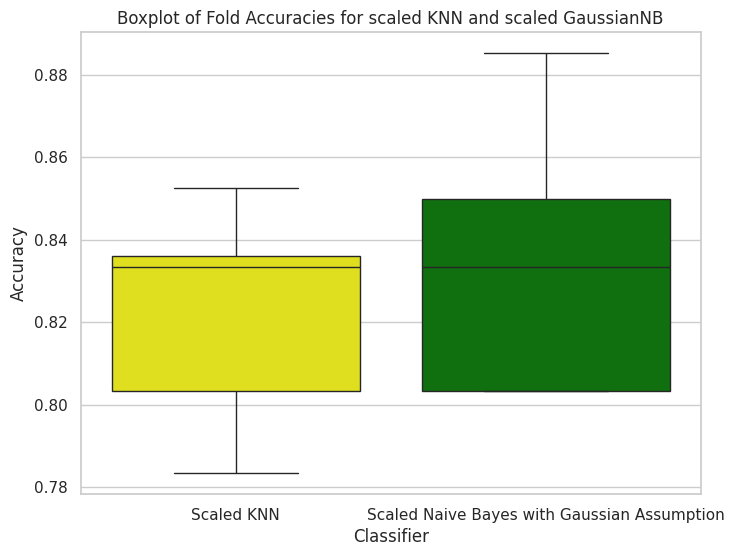

In [36]:
all_scores = list()
for score in knn_cv_scaled_scores:
    all_scores.append({
        "Classifier": "Scaled KNN",
        "Accuracy": score
    })

for score in gnb_cv_scaled_scores:
    all_scores.append({
        "Classifier": "Scaled Naive Bayes with Gaussian Assumption",
        "Accuracy": score
    })

scores_df = pd.DataFrame(all_scores)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x="Classifier", y="Accuracy", data=scores_df, hue="Classifier", palette=["yellow", "green"])
plt.title("Boxplot of Fold Accuracies for scaled KNN and scaled GaussianNB")
plt.ylabel("Accuracy")
plt.xlabel("Classifier")
plt.show()

The KNN model had significant improvement in accuracy and had more stable results after min-max scaling the dataset. As mentioned in the previous answer the K-nearest neighbour models are sensitive to the scale of the dataset, and scaling can significantly improve the performance of the model. Scaling ensures that all features contribute equally to the distance calculation in the KNN. 

The Naive bayes model with a gaussian assumption had very little to no difference in the results between the scaled and non-scaled data. In the Gaussian model, each feature is modeled separately with its own mean (𝜇) and variance (𝜎) according to the normal distribution. The Naive Bayes model with a Gaussian assumption is insensitive to scaling because this mean and variance are put into consideration when calculating predictions. This explains the indifference in the results.

### c. 

In [35]:
res = stats.ttest_rel(knn_cv_scaled_scores, gnb_cv_scaled_scores, alternative='greater')
print("p1>p2? pval=",res.pvalue)

p1>p2? pval= 0.7462688051215336


Through the statistical hypothesis test we computed a very high p-value (pvalue=0.7462688), and therefore cannot reject the null hypothesis at any of the common significance levels (0.1, 0.05, 0.01). This means that we do not have enough statistical evidence supporting the assertion that “the kNN model is statistically superior to naïve Bayes regarding accuracy”.

## Exercise 2

In [37]:
k = [1, 5, 10, 20, 30]
w = ["uniform", "distance"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### a.

In [39]:
train_accuracies = {"label": "Train Accuracies"}
test_accuracies = {"label": "Test accuracies"}

for n_neighbours in k:
    for weights in w:
        knn_clf = KNeighborsClassifier(n_neighbors=n_neighbours, weights=weights)
        knn_clf.fit(X_train, y_train)
        train_score = knn_clf.score(X_train, y_train)
        test_score = knn_clf.score(X_test, y_test)

        train_accuracies.setdefault(weights, list()).append(train_score)
        test_accuracies.setdefault(weights, list()).append(test_score)


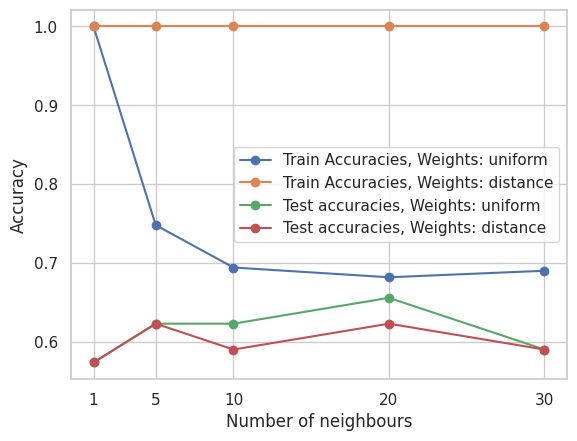

In [40]:
for accuracies in (train_accuracies, test_accuracies):
    for weights in w:
        plt.plot(k, accuracies[weights], "o-", label = f"{accuracies['label']}, Weights: {weights}")
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy")
plt.xticks(k)
plt.legend()
plt.show()

b.

Increasing the number of neighbours, in the knns of both weights (Uniform and Distance), improves the generalization capacity of the model. The model tends to overfit the smaller the number of neighbours parameter is. This is because when you increase n_neighbors, the model considers more neighboring data points to make a prediction. This therefore prevents overfitting because the decision is based on a larger sample of the training data, rather than on a few close neighbors.

## Exercise 3

#### Gaussian assumption
Some variables do not conform to normal distributions well...

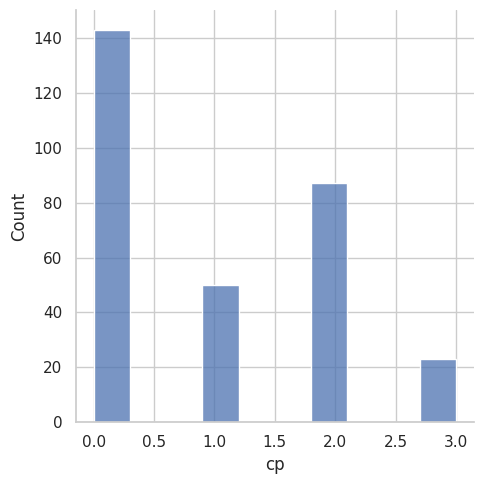

In [45]:
sns.displot(heart_disease, x="cp")

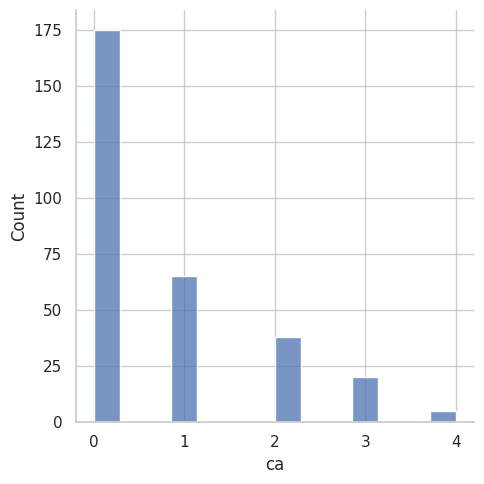

In [48]:
sns.displot(heart_disease, x="ca")

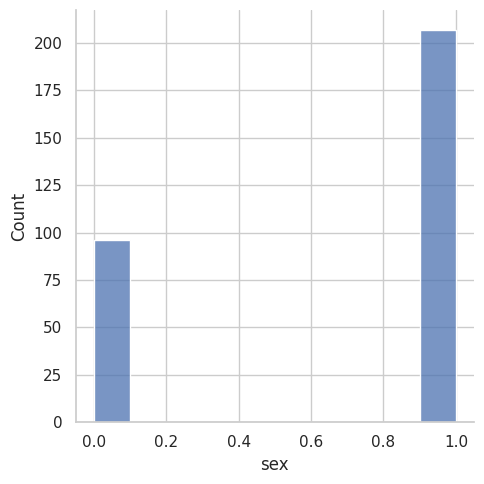

In [49]:
sns.displot(heart_disease, x="sex")

#### Naïve Bayes Class-conditional independence assumption
Some variables are not independent to one another...

For example those with heart disease who have sex == 1, seem to tend to have a younger age than those with sex == 0.
After making a statistical test of such hypothesis with a pvalue of 0.007 we can say that evidence supports it being true even for common significance levels of 𝛼 = 0.01.

np.float64(0.007195086988472378)

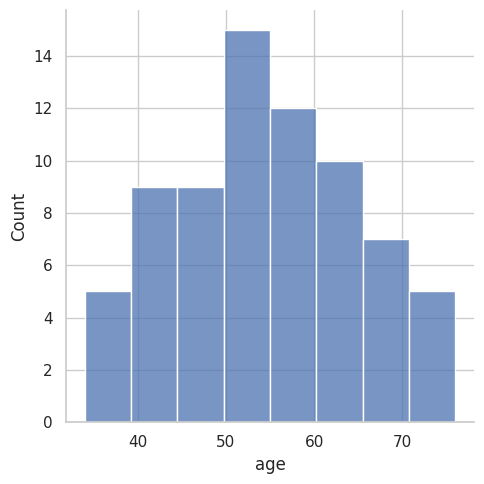

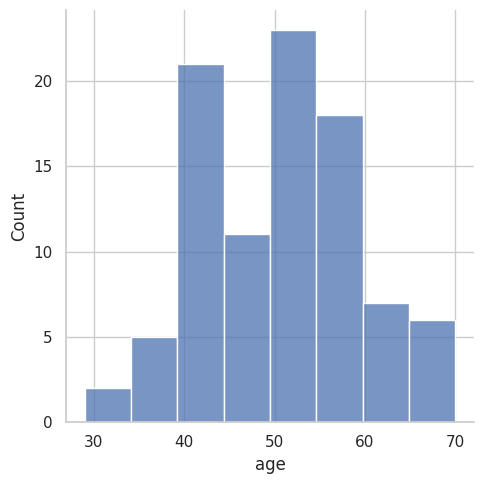

In [146]:
diseased = heart_disease[heart_disease["target"] == 1]
diseased_0 = diseased[diseased["sex"] == 0]
diseased_1 = diseased[diseased["sex"] == 1]
sns.displot(diseased_0, x="age")
sns.displot(diseased_1, x="age")

stats.ttest_ind(diseased_0["age"], diseased_1["age"], alternative='greater').pvalue